In [1]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

import numpy as np

## Make sure Python 3.7 or above is used
import sys
assert sys.version_info >= (3, 7)

## Make sure Sklearn 1.0.1 or above is used
from packaging import version
import sklearn
assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

# Needed for importing the data
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

#for plotting
import matplotlib.pyplot as plt

# extra code – the next 5 lines define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

#for splitting the dataset into test and train sets
from sklearn.model_selection import train_test_split

#for stratified splitting the dataset into test and train sets
from sklearn.model_selection import StratifiedShuffleSplit

#for creating scatter plots of a datasets attributes against each other
from pandas.plotting import scatter_matrix

#for imputation of data
from sklearn.impute import SimpleImputer

#for changing categorial data to numbers in preprocessing of data
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

#for Scaling numerical data (normilization or standardization)
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#for rbf kernel for multiomodal data transformation
from sklearn.metrics.pairwise import rbf_kernel

#for creating custom transformers
from sklearn.preprocessing import FunctionTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted

#for linear regression and transformed label regressor
from sklearn.linear_model import LinearRegression
from sklearn.compose import TransformedTargetRegressor

#for K-mean clustering
from sklearn.cluster import KMeans

# for creating custom transformers
from sklearn.base import BaseEstimator, TransformerMixin

#for clustering
from sklearn.cluster import KMeans

#for creating pipelines
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn import set_config

#for creating cat + num transformers
from sklearn.compose import ColumnTransformer

from sklearn.compose import make_column_selector, make_column_transformer

#for regressopm
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from scipy import stats

#for saving models
import joblib

# End-to-End Learning Project (Regression Project)

## Steps
- Big Picture
- Get the Data
- Explore and visualize data
- Prepare Data
- Select Model and Train It
- Fine Tune Model
- Solution presentation
- Monitor and Maintenance of system

#### ============================
## Problem Statement
### Data
California Housing prices. We use California census data to build a model for housing prices in the state.

#### ============================
### Frame the problem
Building the model is not the end goal. How does the company expect to use and benefit from this model? In other words, how does this model is used in the <u>data pipeline</u>. A sequence of data processing components is called the <u>data pipeline</u>.

#### ============================
### Designing the system

What kind of training supervision the model will need? (supervised, unsupervised, ...) Is it classification task, regression, or else? Batch learning or online learning? 

So for this problem: It is a <i>supervised learning</i> (datas are labeled), it's <i>multiple regression</i> problem (because we are prediciting a value based on multiple features). It's <i>univariate regression</i> because we only predict one value (as opposed to multivariate regression). It can be trained by <i>batch learning</i> because the data is not very large and we do not have a continous flow of data coming into the system.

#### ============================
### Select a Perforemance Measure

A typical perforemance measure is the RMS error (RMSE).

$$RMSE(X,h)=\sqrt{\frac{1}{m}\sum_{i=1}^{m} (h(x^{(i)})-y^{(i)})^2}$$

where $X$ is the matrice of all features. $h$ is the system predictor function called hypothesis ($\hat{y}=h(x^{(i)})$ is the prediction). $m$ is the number of instances in the dataset. $x^{(i)}$ is a vector of all the fetures values of the $i$-th instance and $y^{(i)}$ is the label or desired output.

- RMSE corresponds to Euclidan Norm between the label and the predicted value or $\mathscr{l}_2$ or $||.||_2$.
- MAE (mean absolute error) corresponds to the Manhattan Norm between the label and preducted value or $\mathscr{l}_1$
- Generally, $\mathscr{l}_k$ norm is $(|v_1|^k+|v_2|^k+...|v_n|^k)^{\frac{1}{k}}$. $\mathscr{l}_0$ is number of nonzero vectores. $\mathscr{l}_\infty$ is the maximum vector

The larger the norm index is, the more focus is on large data values. So RMSE is more sensitive to outliers than MAE. When the outliers are rare, then RMSE performs really well.

#### ============================
### Get the Data

It's good pratice to write a function that downloads and decompresses the data. this helps to update the data regularly

In [2]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

def load_housing_data():
    tarbal_path = Path("datasets/housing.tgz") #creates the download path
    if not tarbal_path.is_file(): #checks if such a file already exists
        Path("datasets").mkdir(parents=True, exist_ok=True) #creates a directory called datasets
        url = "https://github.com/ageron/data/raw/main/housing.tgz" 
        urllib.request.urlretrieve(url, tarbal_path) #gets the file from the url and copies in the path
        with tarfile.open(tarbal_path) as housing_tarball:
            housing_tarball.extractall(path="datasets") #extracts the tgz file
    return pd.read_csv(Path("datasets/housing/housing.csv")) #returns the dataset using pandas read csv

housing = load_housing_data()

In [3]:
housing.head() #shows the top 5 rows of the dataset

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing.info() #gives us a quick decription of the data. Non-Null count say how many non-null entries are provided

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
housing["ocean_proximity"].value_counts() #can find out what categories exists and how many districts belong to each category

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [6]:
housing.describe() #provides a summary of numerical attributes not considering the null entries

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


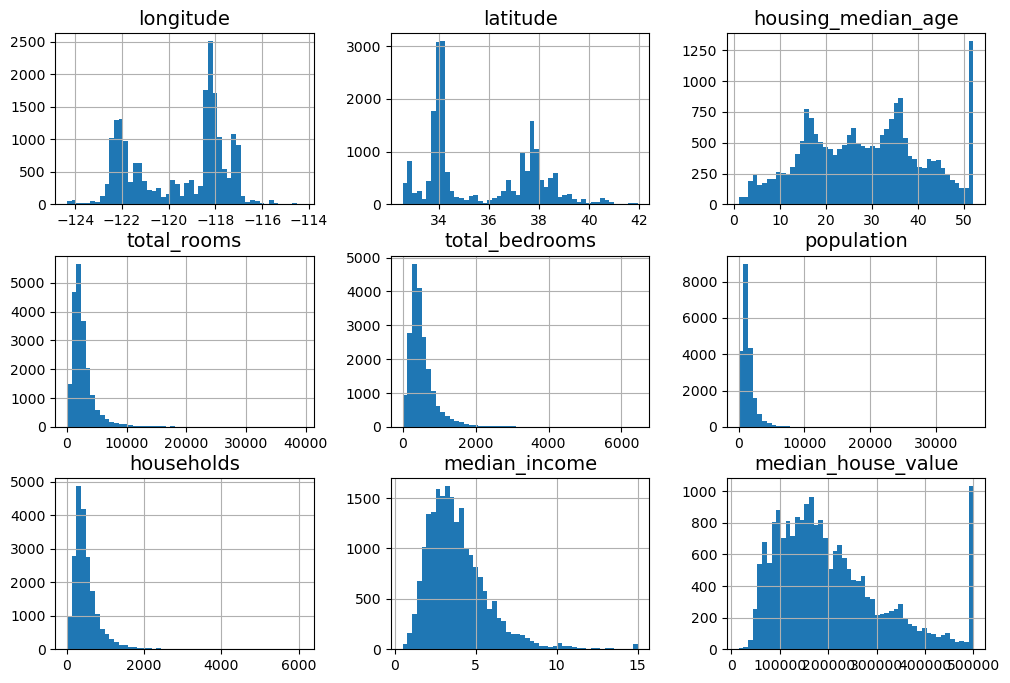

In [7]:
#for plotting
import matplotlib.pyplot as plt

# extra code – the next 5 lines define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

housing.hist(bins=50, figsize=(12, 8)) #provides histogram for each feature in the dataset
plt.show()

By looking at the above a few things is shown:

- Median income, median age, and median house values are capped. The first two might be able to work with, but the later (house value) can be problematic as it is the value we want to model. We can either collect the correct labels for each instance or removed the capped values from training.
- Each attribute has different scale, so scaling might be needed.
- Most of the attrubutes are skewed right. This might mke it harder for some ML alg to detect patterns. Later we will learn how to make it more symmetrical and bell-shaped.


### Create a Test Set

- It's good to set aside a test set and don't look at it. When you look at the whole dataset, the brain can become biased and choose a model that overfits the data. It might work great for the dataset, but not on new instances of data.

- It's good to pick some instances randomly (about 20%) and set them aside:

In [8]:
def shuffle_and_split_data(data, test_ratio): #defining a function that shuffles a data and chooses a part as training set and the rest as test set
    np.random.seed(42) #ensures eahc time we run the function, the same indices are chosen as the test set (in the next step)
    shuffled_indices = np.random.permutation(len(data)) #shuffles the indexes of the data in datset
    #print(shuffled_indices)
    test_set_size = int(test_ratio*len(data)) #choose number of instances in the test set
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [9]:
train_set, test_set = shuffle_and_split_data(housing, 0.2)
print(f'The TRAINING set has {len(train_set)} instances ({len(train_set)*100/len(housing)}%).')
print(f'The TEST set has {len(test_set)} instances ({len(test_set)*100/len(housing)}%).')

The TRAINING set has 16512 instances (80.0%).
The TEST set has 4128 instances (20.0%).


- When we randomize the test set like above, if we run it several times, after a while the ML alg will see the whole dataset. So we either need to save the sets after the first generation or set the random number generators seed before randomizing (np.random.seed(42)). But this does not work if we update are original dataset.

 - Scikit-learn provides a few functions to split dataset. Easiest one is train_test_split(). We can pass multiple datasets with an indentical number of rows and it wull split them on the same indices (useful when we have separate dartaframes for labels):

In [10]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

print(f'The TRAINING set has {len(train_set)} instances ({len(train_set)*100/len(housing)}%).')
print(f'The TEST set has {len(test_set)} instances ({len(test_set)*100/len(housing)}%).')

test_set

The TRAINING set has 16512 instances (80.0%).
The TEST set has 4128 instances (20.0%).


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-122.38,40.67,10.0,2281.0,444.0,1274.0,438.0,2.2120,65600.0,INLAND
3024,-118.37,33.83,35.0,1207.0,207.0,601.0,213.0,4.7308,353400.0,<1H OCEAN
15663,-117.24,32.72,39.0,3089.0,431.0,1175.0,432.0,7.5925,466700.0,NEAR OCEAN
20484,-118.44,34.05,18.0,4780.0,1192.0,1886.0,1036.0,4.4674,500001.0,<1H OCEAN
9814,-118.44,34.18,33.0,2127.0,414.0,1056.0,391.0,4.3750,286100.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
15362,-121.92,40.52,13.0,4581.0,881.0,1799.0,734.0,2.2993,99500.0,INLAND
16623,-122.08,37.68,26.0,2607.0,682.0,1401.0,607.0,2.6563,184100.0,NEAR BAY
18086,-119.00,35.39,42.0,2839.0,516.0,1203.0,487.0,3.7708,79400.0,INLAND
2144,-117.92,33.63,39.0,1469.0,226.0,553.0,225.0,7.8496,490800.0,<1H OCEAN


- The random selection of the train and test sets work fine when we have large datasets. But when the dataset is small, random samples can introduce sampling bias.

- Stratified Sampling: In order to make sure our samples have representatives of all of the population in order to avoid sampling bias. We divide the poluation into homogenous subgroups called strata and we make sure we use right number of instances to make sure that the test set is representative of overall population.

In our example of housing prices, suppose that the median income is a very important attribute. 

We can use pd.cut() to add an atribute to the dataset which labels each instance based on its category of median income.

In [11]:
# We add a new category incom_cat to the attributes and assign a value based on the defined bins
housing["income_cat"]=pd.cut(housing["median_income"], bins=[0,1.5,3,4.5,6,np.inf], labels=[1,2,3,4,5])
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


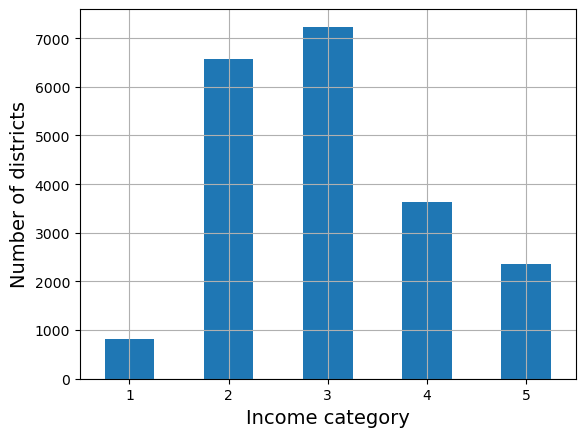

In [12]:
housing["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Income category")
plt.ylabel("Number of districts")
plt.show()

- The sklearn.model_selection package implements various strategies to split dataset to train and test sets. Split() methods returns the indices, and not the data. Having multiple splits is usefull for cross-validation.

In [13]:
from sklearn.model_selection import StratifiedShuffleSplit

#This generates 10 splits of the same data and saves it in a list
splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
strat_splits = []
#we can iterate over splitter.split to create new splits. each time it gives us a new incides for both sets that we can save in another list
for train_index, test_index in splitter.split(housing, housing["income_cat"]):
    strat_train_set_n = housing.iloc[train_index]
    strat_test_set_n = housing.iloc[test_index]
    strat_splits.append([strat_train_set_n, strat_test_set_n])

    
#To use the first split as our train and test set:
strat_train_set, strat_test_set = strat_splits[0]

- The below command does the same as the obove, but in a single line to get a single split. We use the train_test_split with a stratify arguement.

In [14]:
strat_train_set, strat_test_set = train_test_split(housing, test_size=0.2, stratify = housing["income_cat"], random_state=42)

In [15]:
#shows the percentage of each category chosen in the test data, which shows we chose a good distributon of the population
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [16]:
# extra code – compare the popluation distribution using different methods

def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

#creating a random split of the dataset
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

#creating a new datafrom
compare_props = pd.DataFrame({
    "Overall %": income_cat_proportions(housing),
    "Stratified %": income_cat_proportions(strat_test_set),
    "Random %": income_cat_proportions(test_set),
}).sort_index()

(compare_props * 100).round(2)

,Overall %,Stratified %,Random %
1,3.98,4.00,4.24
2,31.88,31.88,30.74
3,35.06,35.05,34.52
4,17.63,17.64,18.41
5,11.44,11.43,12.09


- Since we do not use the "income_cat" attribute anymore, it is better to remove it from our data

In [17]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat",axis=1,inplace=True)

strat_train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,458300.0,NEAR BAY
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,483800.0,<1H OCEAN
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330,101700.0,INLAND
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618,96100.0,INLAND
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292,361800.0,NEAR OCEAN


#### ============================
## Exploring and Visualizing Data

Let's only work on the training set. If the dataset is large, we need to sample an exploration set to make manipulation and explortion easier and faster.

### Geographical Visualization


In [18]:
#make a copy of the training set, so if needed the original set can be reverted

housing = strat_train_set.copy()

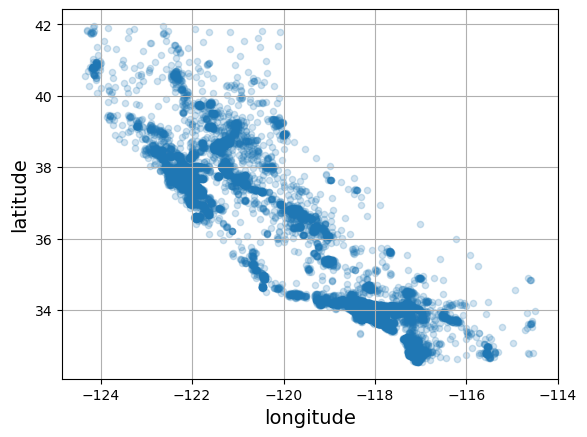

In [19]:
#creating a geographical scatterplot

#alpha sets the transparency of points and makes it easier to see dense areas by seeing the overlapping areas
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True, alpha=0.2)
plt.show()

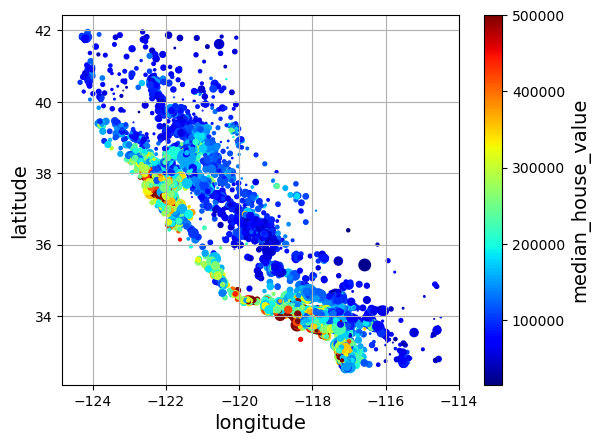

In [20]:
#creating a geographical scatterplot 
#the radius of each circle represents the population (option s) and the color represents the price (option c)

housing.plot(kind="scatter", x="longitude", y="latitude", grid=True, s=housing["population"]/100,
             c="median_house_value", cmap="jet", colorbar=True, legend=True)
plt.show()

- It clearly shows that prices depends on the location of the property and the population of the district. Also the attribute ocean proximity can also be useful (but does not apply to every area as you can see in Northern parts)

### Looking for Correlations

- If the dataset is not too large, we can calculate the standard/pearson correlation between every pair of attributes.

In [21]:
corr_matrix = housing.corr()

# to see the corr between house value and other attributes
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
longitude            -0.050859
latitude             -0.139584
Name: median_house_value, dtype: float64

- We can create the corelation scatter plots using scatter_matrix in Pandas.

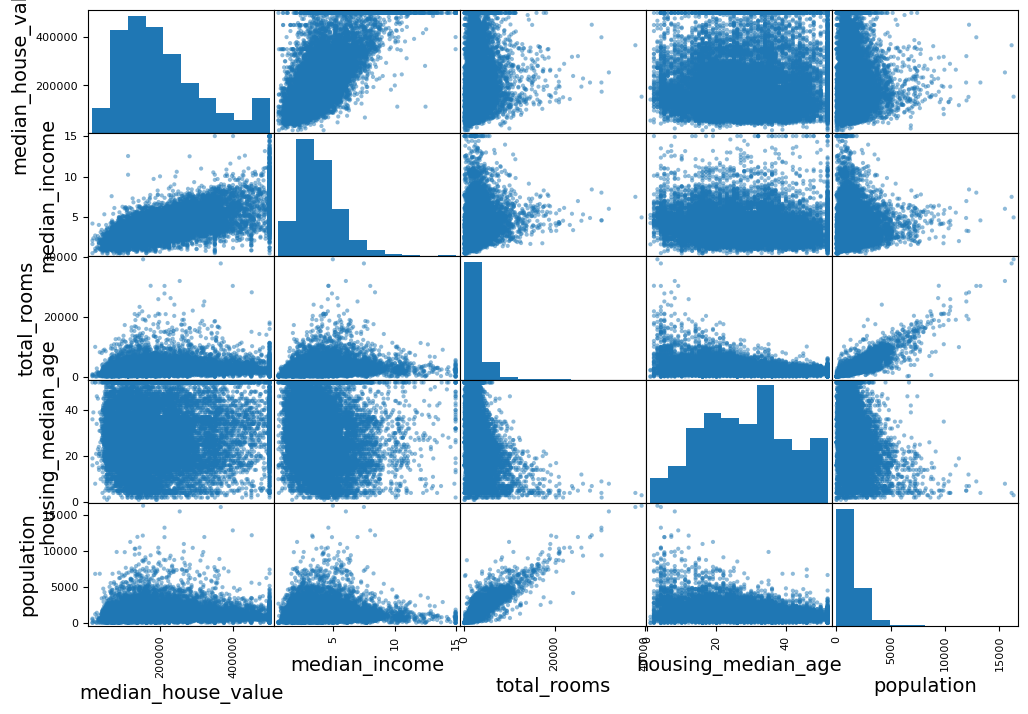

In [22]:
#shwoing attributes against each other (correlation scattter plot)
from pandas.plotting import scatter_matrix

#chosing which attributes to show
attributes=["median_house_value", "median_income", "total_rooms", "housing_median_age", "population"]
scatter_matrix(housing[attributes], figsize=(12,8))
plt.show()
# the diagonals are histograms

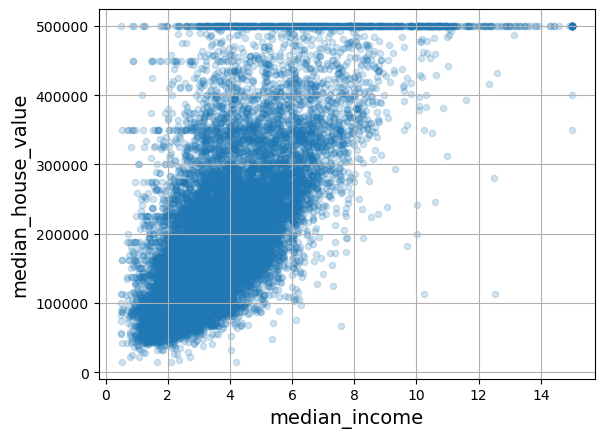

In [23]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",alpha=0.2, grid=True)
plt.show()

Just looking between the correlation of median income and house values:
- we can see a strong correlation
- Price is caped at $500k
- there are some straight lines at 450K, 350k, 280K

You might want to remove the corresponding district

### Experimenting with Attribute Combinations

We can combine some of the attributes in order to have more ineresting and useful data.
For example in this practice these can be helpful:
- number of rooms per houshold
- number of bedrooms per rooms (ratio of rooms)
- number of people per house

In [24]:
housing["rooms_per_house"]=housing["total_rooms"]/housing["households"]
housing["bedrooms_ratio"]=housing["total_bedrooms"]/housing["total_rooms"]
housing["people_per_house"]=housing["population"]/housing["households"]

housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_house,bedrooms_ratio,people_per_house
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,458300.0,NEAR BAY,3.211799,0.335742,1.524178
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,483800.0,<1H OCEAN,5.504202,0.180153,1.865546
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330,101700.0,INLAND,5.334975,0.200369,2.768473
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618,96100.0,INLAND,5.351282,0.203881,2.365385
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292,361800.0,NEAR OCEAN,3.725256,0.277371,1.631399


In [25]:
corr_matrix=housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
rooms_per_house       0.143663
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
people_per_house     -0.038224
longitude            -0.050859
latitude             -0.139584
bedrooms_ratio       -0.256397
Name: median_house_value, dtype: float64

- Clearly the bedrooms_ratio gives us very good data that is much better than total_bedrooms attribute.

#### ============================
## Preparing Data for ML Algorithm

It's better to write functions to do this instead of manually:
- Transformations will be reproducable
- A library of transformation matrices are created that can be used later
- Can be used in a live system
- It makes it easy to do a combination of transformations and check which transformations work better

In [26]:
#reverting to our original dataset and removing labels
housing = strat_train_set.drop("median_house_value",axis=1)
housing_labels = strat_train_set["median_house_value"].copy()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,NEAR BAY
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,<1H OCEAN
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330,INLAND
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618,INLAND
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292,NEAR OCEAN


In [27]:
housing_labels.head()

13096    458300.0
14973    483800.0
3785     101700.0
14689     96100.0
20507    361800.0
Name: median_house_value, dtype: float64

### Clean Data

If the data has missing data for some of the features (in this case the total bedroom), you can:
- Get rid of those instances of data using dropna()
- Get rid of that attribute using drop()
- Imputation: setting those values to some value (0, mean, median, etc.) using fillna()or simpleimputer()

In [28]:
housing.info()
##data is missing from total_bedrooms

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 13096 to 19888
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16344 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


In [29]:
#dropping null instances
housing = housing = strat_train_set.copy()
housing = strat_train_set.drop("median_house_value",axis=1)
housing.dropna(subset=["total_bedrooms"], inplace=True)
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16344 entries, 13096 to 19888
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16344 non-null  float64
 1   latitude            16344 non-null  float64
 2   housing_median_age  16344 non-null  float64
 3   total_rooms         16344 non-null  float64
 4   total_bedrooms      16344 non-null  float64
 5   population          16344 non-null  float64
 6   households          16344 non-null  float64
 7   median_income       16344 non-null  float64
 8   ocean_proximity     16344 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.2+ MB


In [30]:
#dropping the attribute
housing = strat_train_set.copy()
housing = strat_train_set.drop("median_house_value",axis=1)
housing = housing.drop("total_bedrooms",axis=1)
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 13096 to 19888
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   population          16512 non-null  float64
 5   households          16512 non-null  float64
 6   median_income       16512 non-null  float64
 7   ocean_proximity     16512 non-null  object 
dtypes: float64(7), object(1)
memory usage: 1.1+ MB


In [31]:
#Imputation
housing = strat_train_set.copy()
housing = strat_train_set.drop("median_house_value",axis=1)
median=housing["total_bedrooms"].median()
housing["total_bedrooms"].fillna(median, inplace=True)
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 13096 to 19888
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


- Best way for imputation is using the SimpleImputer from sklearn library. The benefit is that it store the median value of each feature and makes it possible to impute missing values in validation set, the test set, or any new data fed to the model:

In [32]:
from sklearn.impute import SimpleImputer
housing = strat_train_set.copy()
housing = strat_train_set.drop("median_house_value",axis=1)

#creating an object of SimpleSimpleImputer
imputer = SimpleImputer(strategy="median")

#since this only work on numerical datas, thewe need to create a copy of the data with only numbers
housing_num = housing.select_dtypes(include=[np.number])
housing_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 13096 to 19888
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16344 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


In [33]:
#Fitting the imputer instance to the dataset to calculate the median
imputer.fit(housing_num)

SimpleImputer(strategy='median')

- In above, the imputer stores the median of all data in statistics_ variable.

In [34]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

In [35]:
#imputing
X=imputer.transform(housing_num) #return nparray
housing_tr = pd.DataFrame(X, columns = housing_num.columns, index=housing_num.index)
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 13096 to 19888
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


Missing items can be replaced with:
- median SimpleImputer(strategy="median")
- mean: SimpleImputer(strategy="mean")
- most frequent: SimpleImputer(strategy="most_frequent")
- constant: SimpleImputer(strategy="constant", fill_value= ...)

There are also more powerful imputers in the sklearn.impute package
- KNNImputer: replaces each missing value with the mean of the k-nearest neighbor's value. The distance is based on all available features.
- IterativeImputer: Trains a regression model per feaure to predict the missing values based on all other available features.

### Handling Texts and Categorial Attributes
To convert categorial attributes to numbers we can use class OrdinalEncoder from Sklearn library. The list of categories are saved in the categoris_ instance variable. It returns an array.

In [36]:
housing_cat = housing[["ocean_proximity"]]
housing_cat["ocean_proximity"].head()

13096      NEAR BAY
14973     <1H OCEAN
3785         INLAND
14689        INLAND
20507    NEAR OCEAN
Name: ocean_proximity, dtype: object

In [37]:
from sklearn.preprocessing import OrdinalEncoder
#creating an object of the class
ordinal_encoder = OrdinalEncoder()

#fitting and transforming the ordinal encoder to our data
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
print(housing_cat_encoded)

#list of categories
ordinal_encoder.categories_

[[3.]
 [0.]
 [1.]
 ...
 [4.]
 [0.]
 [4.]]


[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

The problem with this type of encoding is that ML alg can consider 0 and 1 two values close to each others. For categories that are actually close this might work, but in this case, this does not work. So we can use one-hot encoder. This encoder creates dummy attributes for each category. The instace has 1 value for this attribute if it is in this category, and 0 if it is not. For this we can use OneHotEncoder class in sklearn. it returns a SciPy sparse matrix. The problem with onehot encoder is that if the number of categories are large, then it will make our dataframe very large. So maybe it is better to subtitute it with a numerical value (e.g., in this case the distance to ocean) or use other encoders in Sklearn.

In [38]:
from sklearn.preprocessing import OneHotEncoder

#creating instance of class
cat_encoder = OneHotEncoder()

#fit and transform to data
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

#returns a sparse Scipy matrix
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [39]:
#converting to a 2D Numopy array
housing_cat_1hot.toarray()

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [40]:
#getting the list of categories
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

Alternativley we can use the Pandas get_dummies() function to create one-hot encoding. But it does not remember the categories. So OneHotEncoder is better.

When you use any sklear estimator using a DataFrame, the estimator stores trhe column names in feature_names_in_ variable. You can also use get_feature_names_out() to build a datafram around a transformer output:

In [41]:
#name of the input attribute to the transformer
cat_encoder.feature_names_in_

array(['ocean_proximity'], dtype=object)

In [42]:
#returns the name of created transofrmaion columns
cat_encoder.get_feature_names_out()

array(['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'], dtype=object)

In [43]:
#creating a pandas dataframe around the output
df_output = pd.DataFrame(housing_cat_1hot.toarray(), columns =cat_encoder.get_feature_names_out(), index = housing_cat.index)
df_output

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
13096,0.0,0.0,0.0,1.0,0.0
14973,1.0,0.0,0.0,0.0,0.0
3785,0.0,1.0,0.0,0.0,0.0
14689,0.0,1.0,0.0,0.0,0.0
20507,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...
14207,1.0,0.0,0.0,0.0,0.0
13105,0.0,1.0,0.0,0.0,0.0
19301,0.0,0.0,0.0,0.0,1.0
19121,1.0,0.0,0.0,0.0,0.0


### Feature Scaling and Transformation

Most ML algs don't perform well when the numerical atrributes have very different scales. Without scaling, the ML is biased toward largers values and might ignore the smaller values.
Two methods:
- Min-max scaling (normalization): values are shifted and rescaled and the range is 0 to 1. Each value is substratced by min value and divided by (Max - Min). For his we can use MinMaxScaler. It has a feature_parameter variable which can be used to customized the range if we don't want 0-1. It can be effected by outliers in the test data if it is larger or smaller than the min and max in training set. Also if we have a large outlier in the training data, then that value is set to 1 and the rest of values will fall in much smaller data range.
- Standardization: First the values are substratec by mean (demeaned) and then divided by standard deviation. So the range is NOT 0-1 and it is less effected by outliers as opposed to min-max.

Note than you should never use fit() or fit_transform() on anything but the training set. When the scaler is trained, then we can apply it to test set and others using just tranform().



In [44]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler(feature_range=(-1,1))
housing_num_minmax = min_max_scaler.fit_transform(housing_num)
housing_num_minmax

array([[-0.60851927,  0.11702128,  1.        , ..., -0.80701754,
        -0.61433638, -0.7794789 ],
       [ 0.21095335, -0.66170213,  0.52941176, ..., -0.91866029,
        -0.86708979, -0.22929339],
       [-0.51926978,  0.23617021,  0.25490196, ..., -0.93141946,
        -0.92458466, -0.73336919],
       ...,
       [ 0.47870183, -0.99148936, -0.52941176, ..., -0.65513434,
        -0.71663244, -0.50873781],
       [ 0.20689655, -0.6787234 ,  0.41176471, ..., -0.78873758,
        -0.68751167, -0.49716556],
       [-0.60649087,  0.08723404,  0.68627451, ..., -0.91669734,
        -0.92122457, -0.61608805]])

In [45]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
housing_num_std_scaled = std_scaler.fit_transform(housing_num)
housing_num_std_scaled

array([[-1.42303652,  1.0136059 ,  1.86111875, ...,  0.13746004,
         1.39481249, -0.93649149],
       [ 0.59639445, -0.702103  ,  0.90762971, ..., -0.69377062,
        -0.37348471,  1.17194198],
       [-1.2030985 ,  1.27611874,  0.35142777, ..., -0.78876841,
        -0.77572662, -0.75978881],
       ...,
       [ 1.25620853, -1.42870103, -1.23772062, ...,  1.26829911,
         0.67913534,  0.1010487 ],
       [ 0.58639727, -0.73960483,  0.66925745, ...,  0.27356264,
         0.88286825,  0.14539615],
       [-1.41803793,  0.94797769,  1.22545939, ..., -0.67915557,
        -0.75221898, -0.31034135]])

### Transformation
- When the data has a heavy tail (values far from the mean are not rare), then both of the above methods squash the data in a very small range. This is not ideal for ML Algs. So we need to transform to make the tail shrink and make it roughly symmetrical. For example a square root of the data can be used or for really long and heavy tails, log can be used.

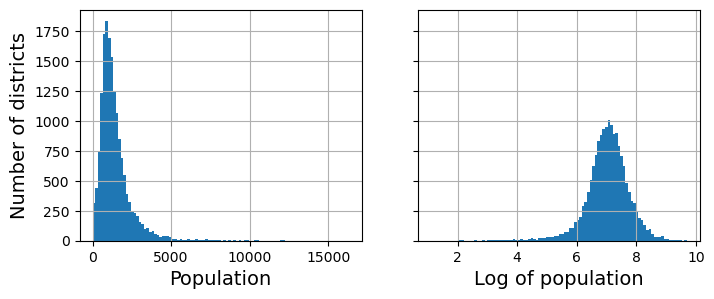

In [46]:
# extra code – this cell generates Figure 2–17
fig, axs = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
housing["population"].hist(ax=axs[0], bins=100)
housing["population"].apply(np.log).hist(ax=axs[1], bins=100)
axs[0].set_xlabel("Population")
axs[1].set_xlabel("Log of population")
axs[0].set_ylabel("Number of districts")
plt.show()

- Another approach is bucketizing (same as we did in stratified sampling). We chop the data distribution into equally-sized buckets and replace each feature with the index of the bucket it belongs to. This results in an almost uniform distribution.

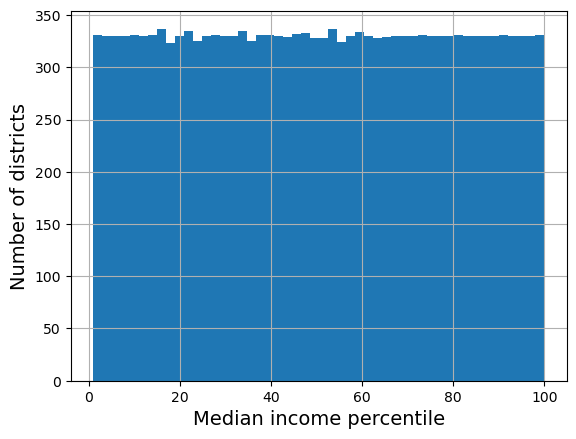

In [47]:
# extra code – just shows that we get a uniform distribution
percentiles = [np.percentile(housing["median_income"], p) for p in range(1, 100)]
flattened_median_income = pd.cut(housing["median_income"],
                                 bins=[-np.inf] + percentiles + [np.inf],
                                 labels=range(1, 100 + 1))
flattened_median_income.hist(bins=50)
plt.xlabel("Median income percentile")
plt.ylabel("Number of districts")
plt.show()
# Note: incomes below the 1st percentile are labeled 1, and incomes above the
# 99th percentile are labeled 100. This is why the distribution below ranges
# from 1 to 100 (not 0 to 100).

- For multimodal data (data with multiple modes or peaks), it is also useful to bucketize the data, and treat the buckets as categories. For example for median_age attribute in the current example, we can treat the houses based on if they are below or over 35 years. Onehotencoders can be used for this purpose but it is better to have small number of buckets or categories.

- Another approach for multimodal data is to add a feature for each mode (peak) representing the similarity between the attribute and the mode. For example in the case of median_age in this example, we can add a fearure on how close is to 35 years. This can be done by RBF (radial basis function) like the Gaussian RBF $exp(-\gamma(x-35)^2)$. $\gamma$ is a hyperparameter that sets how fast the similarity decays when we get far from 35 years. This can be done by rbf_kernel() in sklearn

In [48]:
from sklearn.metrics.pairwise import rbf_kernel

age_simil_35 = rbf_kernel(housing[["housing_median_age"]], [[35.]], gamma=0.1)

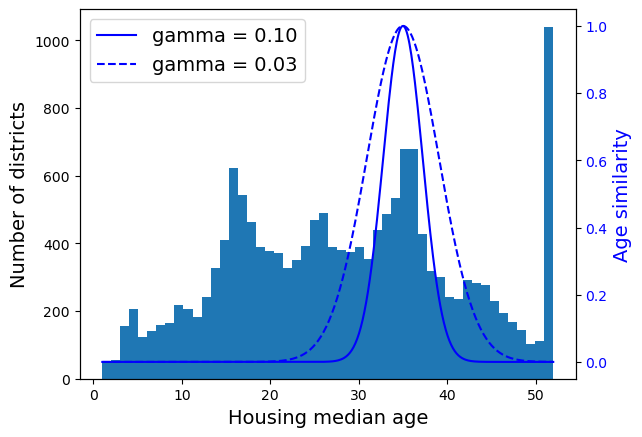

In [49]:
ages = np.linspace(housing["housing_median_age"].min(),
                   housing["housing_median_age"].max(),
                   500).reshape(-1, 1)
gamma1 = 0.1
gamma2 = 0.03
rbf1 = rbf_kernel(ages, [[35]], gamma=gamma1)
rbf2 = rbf_kernel(ages, [[35]], gamma=gamma2)

fig, ax1 = plt.subplots()

ax1.set_xlabel("Housing median age")
ax1.set_ylabel("Number of districts")
ax1.hist(housing["housing_median_age"], bins=50)

ax2 = ax1.twinx()  # create a twin axis that shares the same x-axis
color = "blue"
ax2.plot(ages, rbf1, color=color, label="gamma = 0.10")
ax2.plot(ages, rbf2, color=color, label="gamma = 0.03", linestyle="--")
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylabel("Age similarity", color=color)

plt.legend(loc="upper left")
plt.show()

- The target values may also needs to be transformed. For example a heavy tale label set, might need to be replaced with its log. Then the model will return the log of the median_house_value, not the value itself. Most transformes have inverse_transform() that helps to inverse the transform.

In [50]:
type(housing_labels)

pandas.core.series.Series

In [51]:
from sklearn.linear_model import LinearRegression

#transforming the output(labels) to train a linear regression
target_scaler = StandardScaler()
scaled_labels = target_scaler.fit_transform(housing_labels.to_frame()) #convert housing label to DataFrame

model = LinearRegression()
model.fit(housing[["median_income"]], scaled_labels) #fitting a linear regression between median_income and transformed labels
some_new_data = housing[["median_income"]].iloc[:5]  # pretend this is new data

scaled_predictions = model.predict(some_new_data) #predicting the labels of the new data using the fitted model
predictions = target_scaler.inverse_transform(scaled_predictions) #inversing the transformation to obtain the actual predicted value, not the scaled one
predictions

array([[131997.15275877],
       [299359.35844434],
       [146023.37185694],
       [138840.33653057],
       [192016.61557639]])

- Easier way is to use TransformedTargetRegressor.

In [52]:
from sklearn.compose import TransformedTargetRegressor

#creating an instance of the class
model = TransformedTargetRegressor(LinearRegression(), transformer=StandardScaler())
#fitting unscaled labels
model.fit(housing[["median_income"]],housing_labels)
predictions=model.predict(some_new_data)
predictions

array([131997.15275877, 299359.35844434, 146023.37185694, 138840.33653057,
       192016.61557639])

### Custom Transformers

Sometimes we need to write our own.

- For transformations that do not any training, we can write a function that takes a NumPy array as input and outputs a transformed array:

In [53]:
from sklearn.preprocessing import FunctionTransformer

#creating a log transformer and its inverse
log_transformer = FunctionTransformer(np.log, inverse_func=np.exp)
pop_log=log_transformer.transform(housing[["population"]])
pop_log

,population
13096,7.362645
14973,6.501290
3785,6.331502
14689,7.520235
20507,7.555905
...,...
14207,6.843750
13105,7.257708
19301,7.942362
19121,7.452982


In [54]:
#creating an RBF transformer with hyperparameters
rbf_transformer = FunctionTransformer(rbf_kernel, kw_args=dict(Y=[[35.]], gamma=0.1))
age_simil_35=rbf_transformer.transform(housing[["housing_median_age"]])
age_simil_35

array([[2.81118530e-13],
       [8.20849986e-02],
       [6.70320046e-01],
       ...,
       [9.55316054e-22],
       [6.70320046e-01],
       [3.03539138e-04]])

In [55]:
#creating an RBF transformer measuring geographic similarty with San Fransisco
sf_coords = 37.7749, -122.41

sf_transformer = FunctionTransformer(rbf_kernel, kw_args=dict(Y=[sf_coords], gamma=0.1))
sf_simil = sf_transformer.transform(housing[["latitude","longitude"]])
sf_simil

array([[0.999927  ],
       [0.05258419],
       [0.94864161],
       ...,
       [0.00388525],
       [0.05038518],
       [0.99868067]])

In [56]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,NEAR BAY
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,<1H OCEAN
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330,INLAND
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618,INLAND
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292,NEAR OCEAN


In [57]:
#creating a new feature as ratio of two other features
ratio_transformer = FunctionTransformer(lambda X: X[:, [0]] / X[:, [1]])
ratio_transformer.transform(np.array([[1, 2], [3, 4]]))

array([[0.5 ],
       [0.75]])

- If we want our transformer be trainable (having fit(), transform(), fit_transform() functions: We need to write a class and define each of these.
- You can get fit_transform() without defintion if we add TransformerMixin as base class. It first calls fit and then transform using this
- If we use BaseEstimator as our base class (with no args or kwargs), then you will get two extra methods get_params() and set_params()

In [58]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted

#creating a custome transformer for standard scaler
class StandardScalerClone(BaseEstimator, TransformerMixin): #including these two will allow us to have fit_transform() and get and set_params()
    def __init__(self, with_mean=True): #no args or kwargs
        self.with_mean=with_mean
    
    def fit(self, X, y=None): #y is required even though we don't use it
        X = check_array(X)  # checks that X is an array with finite float values
        self.mean_ = X.mean(axis=0)
        self.scale_ = X.std(axis=0)
        self.n_features_in_ = X.shape[1]
        return self #always return self
    
    def transform(self, X):
        check_is_fitted(self)  # looks for learned attributes (with trailing _)
        X = check_array(X)
        assert self.n_features_in_ == X.shape[1]
        if self.with_mean:
            X=X- self.mean_
        return X/self.scale_

std_scaler = StandardScalerClone()
X=np.array([[1,3,4],[10,2,3],[4,1,4]])
std_scaler.fit(X)
std_scaler.transform(X)

array([[-1.06904497,  1.22474487,  0.70710678],
       [ 1.33630621,  0.        , -1.41421356],
       [-0.26726124, -1.22474487,  0.70710678]])

#### About the above implementation some standards are:
- sklearn.util.validation contains several functions we can use to validate the inputs
- Scikitlearn pipeline requires the fit() method to have 2 arguements X, and y, which is why we need the y=None, even we don't use it
- All Scikitlearn estimators set n_features_in_ in the fit(), and they ensure it with ssert self.n_features_in_ == X.shape[1] in transform() that the same number of features are fed
- The fit() method must return self
- Not included in the above, but all fit() methods should set features_name_in_ when they are passed a dataframe.
- Not included in the above, but all transformers must provide a get_features_name_out_ as well as an inv_tranform() if it can be reversed.

- All custom transfromers can use pther estmators in its implementation. The following a custom transformer uses Kmeans cluster to fit() to identify the main clusters, and then uses rbf_kernel() in the transform() to measure how similar each sample is to each cluster:

[[0.08 0.   0.6  0.   0.   0.99 0.   0.   0.   0.14]
 [0.   0.99 0.   0.04 0.   0.   0.11 0.   0.63 0.  ]
 [0.44 0.   0.3  0.   0.   0.7  0.   0.01 0.   0.29]]


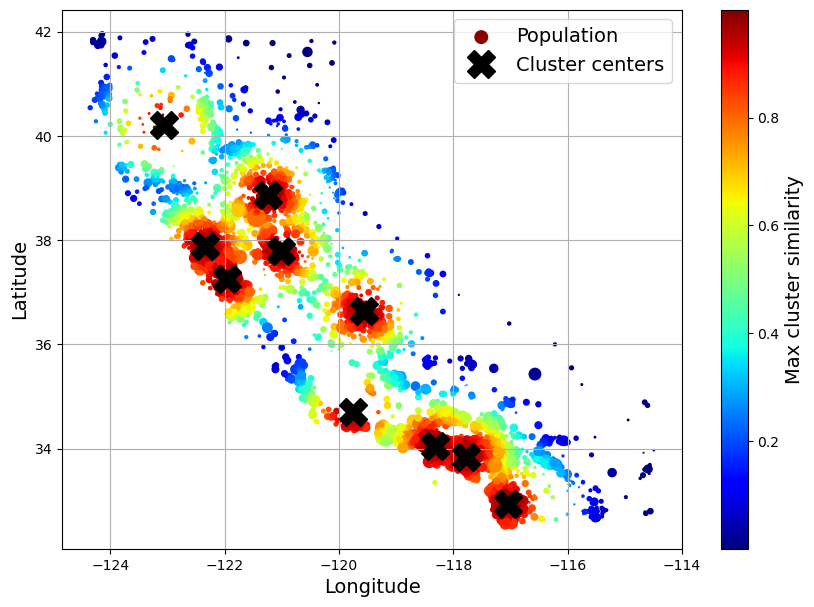

In [59]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.cluster import KMeans

class ClusterSimilarity(BaseEstimator, TransformerMixin):
    #since Kmeans method is based on random function, we can set the random_state to make results more reproducible
    def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state
    
    def fit(self, X, y=None, sample_weight=None):
        self.kmeans_ = KMeans(self.n_clusters, random_state=self.random_state) #creating a KMeans estimator
        self.kmeans_.fit(X, sample_weight=sample_weight) #fitting the data to the estimator to find cluster centers
        return self
    
    def transform(self, X):
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma) #trasnforming using RBF and similarity to cluster centers
    
    def get_feature_names_out(self, names=None):
        return [f"Cluster {i} similarity" for i in range(self.n_clusters)]
    
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)
similarities = cluster_simil.fit_transform(housing[["latitude", "longitude"]],
                                           sample_weight=housing_labels)
print(similarities[:3].round(2))

housing_renamed = housing.rename(columns={
    "latitude": "Latitude", "longitude": "Longitude",
    "population": "Population",
    "median_house_value": "Median house value (ᴜsᴅ)"})
housing_renamed["Max cluster similarity"] = similarities.max(axis=1)

housing_renamed.plot(kind="scatter", x="Longitude", y="Latitude", grid=True,
                     s=housing_renamed["Population"] / 100, label="Population",
                     c="Max cluster similarity",
                     cmap="jet", colorbar=True,
                     legend=True, sharex=False, figsize=(10, 7))
plt.plot(cluster_simil.kmeans_.cluster_centers_[:, 1],
         cluster_simil.kmeans_.cluster_centers_[:, 0],
         linestyle="", color="black", marker="X", markersize=20,
         label="Cluster centers")
plt.legend(loc="upper right")
plt.show()

### Transformation Pipelines

Class pipeline in sklearn can be used to set the sequence of transformations applied to the data. There are two ways to make the pipeline as below:

When the pipleine fit() is called, it calls fit_transform() from the first one , passing the output of each to the next one and at the end only applied fit() to the last one.

The pipeline always exposes the methods of the last transformer. If the last transformer is a predictor, it will show as predict().

Pipelines support indexing so pipeline[0] will show thw first estimator.

In [60]:
from sklearn.pipeline import Pipeline
from sklearn import set_config
num_pipeline = Pipeline([("impute", SimpleImputer(strategy="median")),("standardize", StandardScaler()),])
set_config(display='diagram')
num_pipeline

Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                ('standardize', StandardScaler())])

In [61]:
from sklearn.pipeline import make_pipeline
#another way to create a pipeline without naming each transformation
num_pipeline = make_pipeline(SimpleImputer(strategy="median"),StandardScaler())
num_pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [62]:
print(num_pipeline[-1])

print(num_pipeline.steps)

#print(num_pipeline.named_steps["simpleimputer"])

print(num_pipeline.set_params(simpleimputer__strategy="median"))

StandardScaler()
[('simpleimputer', SimpleImputer(strategy='median')), ('standardscaler', StandardScaler())]
Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])


In [63]:
def monkey_patch_get_signature_names_out():
    """Monkey patch some classes which did not handle get_feature_names_out()
       correctly in Scikit-Learn 1.0.*."""
    from inspect import Signature, signature, Parameter
    import pandas as pd
    from sklearn.impute import SimpleImputer
    from sklearn.pipeline import make_pipeline, Pipeline
    from sklearn.preprocessing import FunctionTransformer, StandardScaler

    default_get_feature_names_out = StandardScaler.get_feature_names_out

    if not hasattr(SimpleImputer, "get_feature_names_out"):
      print("Monkey-patching SimpleImputer.get_feature_names_out()")
      SimpleImputer.get_feature_names_out = default_get_feature_names_out

    if not hasattr(FunctionTransformer, "get_feature_names_out"):
        print("Monkey-patching FunctionTransformer.get_feature_names_out()")
        orig_init = FunctionTransformer.__init__
        orig_sig = signature(orig_init)

        def __init__(*args, feature_names_out=None, **kwargs):
            orig_sig.bind(*args, **kwargs)
            orig_init(*args, **kwargs)
            args[0].feature_names_out = feature_names_out

        __init__.__signature__ = Signature(
            list(signature(orig_init).parameters.values()) + [
                Parameter("feature_names_out", Parameter.KEYWORD_ONLY)])

        def get_feature_names_out(self, names=None):
            if callable(self.feature_names_out):
                return self.feature_names_out(self, names)
            assert self.feature_names_out == "one-to-one"
            return default_get_feature_names_out(self, names)

        FunctionTransformer.__init__ = __init__
        FunctionTransformer.get_feature_names_out = get_feature_names_out

monkey_patch_get_signature_names_out()



In [64]:
housing_num_prepared = num_pipeline.fit_transform(housing_num)

df_housing_num_prepared = pd.DataFrame(
    housing_num_prepared, columns=num_pipeline.get_feature_names_out(),
    index=housing_num.index)
df_housing_num_prepared

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
13096,-1.423037,1.013606,1.861119,0.311912,1.368167,0.137460,1.394812,-0.936491
14973,0.596394,-0.702103,0.907630,-0.308620,-0.435925,-0.693771,-0.373485,1.171942
3785,-1.203098,1.276119,0.351428,-0.712240,-0.760709,-0.788768,-0.775727,-0.759789
14689,1.231216,-0.884924,-0.919891,0.702262,0.742306,0.383175,0.731375,-0.850281
20507,0.711362,-0.875549,0.589800,0.790125,1.595753,0.444376,1.755263,-0.180365
...,...,...,...,...,...,...,...,...
14207,0.586397,-0.833359,0.987087,-0.184147,0.140152,-0.445315,0.060101,0.444041
13105,0.131525,0.319822,-0.443146,0.139847,0.128298,-0.005950,0.083608,-0.685630
19301,1.256209,-1.428701,-1.237721,0.586026,0.562134,1.268299,0.679135,0.101049
19121,0.586397,-0.739605,0.669257,0.522417,0.794461,0.273563,0.882868,0.145396


- So far we handled numerical and categorial pipelines separatley, but we can use ColumnTransfer class to do both at the same time:

In [65]:
from sklearn.compose import ColumnTransformer

num_attribs = ["longitude", "latitude", "housing_median_age", "total_rooms",
               "total_bedrooms", "population", "households", "median_income"]
cat_attribs = ["ocean_proximity"]

# creating a pipeline for categorial data
cat_pipeline=make_pipeline(SimpleImputer(strategy="most_frequent"),OneHotEncoder(handle_unknown="ignore"))

# creating a complete pipeline for processing both numerical and categorial data
preprocessing = ColumnTransformer([("num", num_pipeline, num_attribs),("cat",cat_pipeline,cat_attribs)])

processed_data = preprocessing.fit_transform(housing)

df_processed_data = pd.DataFrame(processed_data, columns=preprocessing.get_feature_names_out(), index=housing.index)

df_processed_data.head(5)

,num__longitude,num__latitude,num__housing_median_age,num__total_rooms,num__total_bedrooms,num__population,num__households,num__median_income,cat__ocean_proximity_<1H OCEAN,cat__ocean_proximity_INLAND,cat__ocean_proximity_ISLAND,cat__ocean_proximity_NEAR BAY,cat__ocean_proximity_NEAR OCEAN
13096,-1.423037,1.013606,1.861119,0.311912,1.368167,0.137460,1.394812,-0.936491,0.0,0.0,0.0,1.0,0.0
14973,0.596394,-0.702103,0.907630,-0.308620,-0.435925,-0.693771,-0.373485,1.171942,1.0,0.0,0.0,0.0,0.0
3785,-1.203098,1.276119,0.351428,-0.712240,-0.760709,-0.788768,-0.775727,-0.759789,0.0,1.0,0.0,0.0,0.0
14689,1.231216,-0.884924,-0.919891,0.702262,0.742306,0.383175,0.731375,-0.850281,0.0,1.0,0.0,0.0,0.0
20507,0.711362,-0.875549,0.589800,0.790125,1.595753,0.444376,1.755263,-0.180365,0.0,0.0,0.0,0.0,1.0


- we can use make_column_selector() to returns a selector function so we don't have to name every single column.
- also if naming pipelines is not important we can use make_column_transformer()

In [66]:
from sklearn.compose import make_column_selector, make_column_transformer

preprocessing = make_column_transformer((num_pipeline, make_column_selector(dtype_include=np.number))
                                        ,(cat_pipeline, make_column_selector(dtype_include=object)),)

housing_prepared = preprocessing.fit_transform(housing)
print(housing_prepared[:5].round(2))

[[-1.42  1.01  1.86  0.31  1.37  0.14  1.39 -0.94  0.    0.    0.    1.
   0.  ]
 [ 0.6  -0.7   0.91 -0.31 -0.44 -0.69 -0.37  1.17  1.    0.    0.    0.
   0.  ]
 [-1.2   1.28  0.35 -0.71 -0.76 -0.79 -0.78 -0.76  0.    1.    0.    0.
   0.  ]
 [ 1.23 -0.88 -0.92  0.7   0.74  0.38  0.73 -0.85  0.    1.    0.    0.
   0.  ]
 [ 0.71 -0.88  0.59  0.79  1.6   0.44  1.76 -0.18  0.    0.    0.    0.
   1.  ]]


In [67]:
df_housing_prepared = pd.DataFrame(housing_prepared, columns=preprocessing.get_feature_names_out(), index=housing.index)

df_housing_prepared.head(5)

,pipeline-1__longitude,pipeline-1__latitude,pipeline-1__housing_median_age,pipeline-1__total_rooms,pipeline-1__total_bedrooms,pipeline-1__population,pipeline-1__households,pipeline-1__median_income,pipeline-2__ocean_proximity_<1H OCEAN,pipeline-2__ocean_proximity_INLAND,pipeline-2__ocean_proximity_ISLAND,pipeline-2__ocean_proximity_NEAR BAY,pipeline-2__ocean_proximity_NEAR OCEAN
13096,-1.423037,1.013606,1.861119,0.311912,1.368167,0.137460,1.394812,-0.936491,0.0,0.0,0.0,1.0,0.0
14973,0.596394,-0.702103,0.907630,-0.308620,-0.435925,-0.693771,-0.373485,1.171942,1.0,0.0,0.0,0.0,0.0
3785,-1.203098,1.276119,0.351428,-0.712240,-0.760709,-0.788768,-0.775727,-0.759789,0.0,1.0,0.0,0.0,0.0
14689,1.231216,-0.884924,-0.919891,0.702262,0.742306,0.383175,0.731375,-0.850281,0.0,1.0,0.0,0.0,0.0
20507,0.711362,-0.875549,0.589800,0.790125,1.595753,0.444376,1.755263,-0.180365,0.0,0.0,0.0,0.0,1.0


### FINAL PREPROCESSING OF THE DATA
- Imputer for missing data
- One Hot Encoder for categorial
- a few ratio_features (bedrooms_ratio, rooms_per_house, people_per_house)
- A few cluster similarties for geographical will be calculated
- Log transform of the heavy tail features
- Standardization

In [68]:
def column_rartio(X):
    return X[:,[0]]/X[:,[1]]

def ratio_name(function_transformer, feature_names_in):
    return ["ratio"]  # feature names out

def ratio_pipeline():
    return make_pipeline(SimpleImputer(strategy="median"),
                         FunctionTransformer(column_rartio, feature_names_out=ratio_name),
                         StandardScaler())

log_pipeline = make_pipeline(SimpleImputer(strategy="median"),
                             FunctionTransformer(np.log, feature_names_out="one-to-one"),
                             StandardScaler())

cluster_simil=ClusterSimilarity(n_clusters=10, gamma=1, random_state=42)

default_num_pipeline=default_num_pipeline = make_pipeline(SimpleImputer(strategy="median"),
                                     StandardScaler())

preprocessing = ColumnTransformer([
        ("bedrooms", ratio_pipeline(), ["total_bedrooms", "total_rooms"]),
        ("rooms_per_house", ratio_pipeline(), ["total_rooms", "households"]),
        ("people_per_house", ratio_pipeline(), ["population", "households"]),
        ("log", log_pipeline, ["total_bedrooms", "total_rooms", "population",
                               "households", "median_income"]),
        ("geo", cluster_simil, ["latitude", "longitude"]),
        ("cat", cat_pipeline, make_column_selector(dtype_include=object)),
    ],
    remainder=default_num_pipeline)  # one column remaining: housing_median_ag

housing_prepared = preprocessing.fit_transform(housing)

df_housing_prepared = pd.DataFrame(housing_prepared, columns=preprocessing.get_feature_names_out(), index=housing.index)

df_housing_prepared.head(5)

,bedrooms__ratio,rooms_per_house__ratio,people_per_house__ratio,log__total_bedrooms,log__total_rooms,log__population,log__households,log__median_income,geo__Cluster 0 similarity,geo__Cluster 1 similarity,...,geo__Cluster 6 similarity,geo__Cluster 7 similarity,geo__Cluster 8 similarity,geo__Cluster 9 similarity,cat__ocean_proximity_<1H OCEAN,cat__ocean_proximity_INLAND,cat__ocean_proximity_ISLAND,cat__ocean_proximity_NEAR BAY,cat__ocean_proximity_NEAR OCEAN,remainder__housing_median_age
13096,1.846624,-0.866027,-0.330204,1.324114,0.637892,0.456906,1.310369,-1.071522,8.708837e-08,9.712456e-01,...,7.114441e-04,3.070969e-17,1.314047e-01,5.740031e-01,0.0,0.0,0.0,1.0,0.0,1.861119
14973,-0.508121,0.024550,-0.253616,-0.252671,-0.063576,-0.711654,-0.142030,1.194712,1.181328e-01,9.738096e-14,...,3.045359e-27,5.437838e-01,1.735342e-09,2.275194e-10,1.0,0.0,0.0,0.0,0.0,0.907630
3785,-0.202155,-0.041193,-0.051041,-0.925266,-0.859927,-0.941997,-0.913030,-0.756981,2.295286e-08,7.457782e-01,...,4.750719e-03,1.605970e-17,2.744847e-01,2.839978e-01,0.0,1.0,0.0,0.0,0.0,0.351428
14689,-0.149006,-0.034858,-0.141475,0.952773,0.943475,0.670700,0.925373,-0.912253,4.618947e-04,3.873884e-20,...,2.916178e-35,7.405721e-01,2.243339e-14,4.218649e-16,0.0,1.0,0.0,0.0,0.0,-0.919891
20507,0.963208,-0.666554,-0.306148,1.437622,1.003590,0.719093,1.481464,0.034537,3.166634e-02,7.905346e-16,...,2.843975e-30,7.501278e-01,2.890866e-11,3.710912e-12,0.0,0.0,0.0,0.0,1.0,0.589800


## Select and Train Model

- #### Linear Regression (RMSE)

In [69]:
from sklearn.linear_model import LinearRegression

lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(housing, housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x7f7...
                                                   'median_income']),
                                                 ('geo',
                                                  ClusterSimilarity(gamma=1,
                                                                    random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f77f11c3280>)])),
                ('linearregression', LinearRegression())])

In [70]:
housing_predictions = lin_reg.predict(housing)
print(housing_predictions[:5].round(1))
print(housing_labels.iloc[:5].values)

[242761.8 375862.8 127481.   99355.3 324610.7]
[458300. 483800. 101700.  96100. 361800.]


In [71]:
from sklearn.metrics import mean_squared_error
lin_rmse = mean_squared_error(housing_labels, housing_predictions,squared=False)
lin_rmse

68647.95686706711

- This is an example of model underfitting the data. So either the data does not represent very well or the model is not powerful enough.

 So we can fix the prblem by:
 - Introudcing other features
 - Choosing another model
 - Reducing the constraints on the model (N/A in this case)
 
 - #### Decision Tree
 Looks like the model overfits the data because rmse is 0.

In [72]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=42))
tree_reg.fit(housing, housing_labels)
housing_predictions=tree_reg.predict(housing)
tree_rmse = mean_squared_error(housing_labels, housing_predictions, squared=False)
tree_rmse

0.0

### Cross-Validation (Better Evaluation)

One way is to split the data into training and test set and train the model on the training set and thn test them against the validation set.

One great alternative is to use Sklearn k-fold cross validation. The code randomly splits the training set into 10 nonoverlapping subsets called folds,. and it check them. The negative of the output is the RMSE value.

From the results below we see that the decision tree performs slightly better, but it is still has problems due to severe overfitting.

In [73]:
from sklearn.model_selection import cross_val_score
#linear regression
lin_rmses = -cross_val_score(lin_reg, housing, housing_labels, scoring="neg_root_mean_squared_error", cv=10)
print(lin_rmses)
pd.Series(lin_rmses).describe()

[69629.27198277 68386.63041132 65659.76107851 80685.25483204
 68585.89530719 68809.28761851 67695.97974629 71179.43136955
 67989.5220715  69858.19782376]


count       10.000000
mean     69847.923224
std       4078.407329
min      65659.761079
25%      68088.799156
50%      68697.591463
75%      69800.966364
max      80685.254832
dtype: float64

In [74]:
#decision tree
tree_rmses = -cross_val_score(tree_reg, housing, housing_labels,scoring="neg_root_mean_squared_error", cv=10)
print(tree_rmses)
pd.Series(tree_rmses).describe()

[66343.67404108 63925.25310602 66874.84912025 66716.81062178
 65930.10085465 70664.63583294 66933.74083972 68454.11092405
 69693.52916464 65996.47822622]


count       10.000000
mean     67153.318273
std       1963.580924
min      63925.253106
25%      66083.277180
50%      66795.829871
75%      68074.018403
max      70664.635833
dtype: float64

- #### Random Forrest

Let's try the RandomForrestRegressor(). They work by training many decision trees on random subsets, then average out their predictions. Such models composed of other models are called <u>ensembles</u>.

In [75]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = make_pipeline(preprocessing, RandomForestRegressor(random_state=42))
forst_rmses = -cross_val_score(forest_reg, housing, housing_labels,scoring="neg_root_mean_squared_error", cv=5)
pd.Series(forst_rmses).describe()

count        5.000000
mean     47299.848801
std        504.224348
min      46675.617597
25%      47121.330276
50%      47258.091632
75%      47377.794467
max      48066.410034
dtype: float64

In [76]:
forest_reg.fit(housing, housing_labels)
housing_predictions = forest_reg.predict(housing)
forest_rmse = mean_squared_error(housing_labels, housing_predictions,
                                 squared=False)
forest_rmse

17547.52124624957

## Fine Tune the Model

### Grid Search
To fine the hyperparameters of the model, we can use sklearn GridSearchCV class to search.

In [77]:
from sklearn.model_selection import GridSearchCV

full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("random_forest", RandomForestRegressor(random_state=42)),
])
param_grid = [
    {'preprocessing__geo__n_clusters': [5, 8, 10],
     'random_forest__max_features': [4, 6, 8]},
    {'preprocessing__geo__n_clusters': [10, 15],
     'random_forest__max_features': [6, 8, 10]},
]
grid_search = GridSearchCV(full_pipeline, param_grid, cv=3,
                           scoring='neg_root_mean_squared_error')
grid_search.fit(housing, housing_labels)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                     SimpleImputer(strategy='median')),
                                                                                    ('standardscaler',
                                                                                     StandardScaler())]),
                                                          transformers=[('bedrooms',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('functiontransformer',
                                                                                          FunctionTransformer(feature_names_out=<f...
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f77f11c3280>)])),
                                       ('random_forest',
                                        RandomForestRegressor(random_state=42))]),
             param_grid=[{'preprocessing__geo__n_clusters': [5, 8, 10],
                          'random_forest__max_features': [4, 6, 8]},
                         {'preprocessing__geo__n_clusters': [10, 15],
                          'random_forest__max_features': [6, 8, 10]}],
             scoring='neg_root_mean_squared_error')

In [78]:
grid_search.best_params_

{'preprocessing__geo__n_clusters': 15, 'random_forest__max_features': 6}

In [79]:
#to see the evaluation scores

cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)

# extra code – these few lines of code just make the DataFrame look nicer
cv_res = cv_res[["param_preprocessing__geo__n_clusters",
                 "param_random_forest__max_features", "split0_test_score",
                 "split1_test_score", "split2_test_score", "mean_test_score"]]
score_cols = ["split0", "split1", "split2", "mean_test_rmse"]
cv_res.columns = ["n_clusters", "max_features"] + score_cols
cv_res[score_cols] = -cv_res[score_cols].round().astype(np.int64)

cv_res

,n_clusters,max_features,split0,split1,split2,mean_test_rmse
12,15,6,43536,43753,44569,43953
13,15,8,44084,44205,44863,44384
14,15,10,44368,44496,45200,44688
7,10,6,44251,44628,45857,44912
9,10,6,44251,44628,45857,44912
6,10,4,44351,44840,46221,45137
8,10,8,44842,45158,45932,45311
10,10,8,44842,45158,45932,45311
3,8,4,45496,45049,46158,45568
4,8,6,45436,45147,46126,45570


- So as it can be seen we reduced the RMSE error using the Grid search.

### Randomized Search

RandomizedSearchCV() can be used like the grid search, but instead of evaluating each comibination of the parameters, it evaluates a fixed number of combinations, selecting a random value for each hyperparam at every iteration.

- there are also other classes like HalvingRandomSearchCV and HalvingGridSearchCV which might be computationally faster

### Ensembled Methods
To use a combination of different methods. Chapter 7


In [80]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {'preprocessing__geo__n_clusters': randint(low=3, high=50),
                  'random_forest__max_features': randint(low=2, high=20)}

rnd_search = RandomizedSearchCV(
    full_pipeline, param_distributions=param_distribs, n_iter=10, cv=3,
    scoring='neg_root_mean_squared_error', random_state=42)

rnd_search.fit(housing, housing_labels)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                           SimpleImputer(strategy='median')),
                                                                                          ('standardscaler',
                                                                                           StandardScaler())]),
                                                                transformers=[('bedrooms',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('functiontransformer',
                                                                                                FunctionTransformer(feature_names_...
                                             ('random_forest',
                                              RandomForestRegressor(random_state=42))]),
                   param_distributions={'preprocessing__geo__n_clusters': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f77d161e050>,
                                        'random_forest__max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f77f04e3f10>},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [81]:
rnd_search.best_params_

{'preprocessing__geo__n_clusters': 45, 'random_forest__max_features': 9}

In [82]:
# extra code – displays the random search results
cv_res = pd.DataFrame(rnd_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
cv_res = cv_res[["param_preprocessing__geo__n_clusters",
                 "param_random_forest__max_features", "split0_test_score",
                 "split1_test_score", "split2_test_score", "mean_test_score"]]
cv_res.columns = ["n_clusters", "max_features"] + score_cols
cv_res[score_cols] = -cv_res[score_cols].round().astype(np.int64)
cv_res.head()

,n_clusters,max_features,split0,split1,split2,mean_test_rmse
1,45,9,41014,42151,42695,41953
8,32,7,41604,42200,43219,42341
0,41,16,42106,42743,43443,42764
5,42,4,41835,42925,43557,42772
2,23,8,42421,43094,43856,43124


## Analyzing the Best Models and their errors

We will gain good insight into the model by inspecting them. for example we can check the relative importance of each feature in the model, then we might retrain the model by dropping the least important features. this can be done using sklearn.feature_selection.SelectFromModel(). when the fit() is called, it will check the importance of models and then when transform() is called in automatically drops the least important ones.

In [83]:
final_model = rnd_search.best_estimator_  # includes preprocessing
feature_importances = final_model["random_forest"].feature_importances_
feature_importances.round(2)

array([0.06, 0.06, 0.05, 0.01, 0.01, 0.01, 0.01, 0.19, 0.01, 0.01, 0.02,
       0.04, 0.01, 0.  , 0.02, 0.01, 0.01, 0.01, 0.01, 0.01, 0.  , 0.  ,
       0.01, 0.  , 0.01, 0.02, 0.02, 0.01, 0.01, 0.01, 0.03, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.  , 0.01, 0.01, 0.02, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.  , 0.08,
       0.  , 0.  , 0.  , 0.01])

In [84]:
sorted(zip(feature_importances,
           final_model["preprocessing"].get_feature_names_out()),
           reverse=True)

[(0.1898423270105783, 'log__median_income'),
 (0.07709175866873944, 'cat__ocean_proximity_INLAND'),
 (0.06455488601956336, 'bedrooms__ratio'),
 (0.056936146643377976, 'rooms_per_house__ratio'),
 (0.0490294770805355, 'people_per_house__ratio'),
 (0.03807069074492323, 'geo__Cluster 3 similarity'),
 (0.025643913400094476, 'geo__Cluster 22 similarity'),
 (0.02179127543243723, 'geo__Cluster 17 similarity'),
 (0.021575251507503695, 'geo__Cluster 6 similarity'),
 (0.017868654556924362, 'geo__Cluster 2 similarity'),
 (0.017431400050755975, 'geo__Cluster 32 similarity'),
 (0.015981159400591683, 'geo__Cluster 18 similarity'),
 (0.01488846425739688, 'geo__Cluster 40 similarity'),
 (0.014488389218107143, 'geo__Cluster 43 similarity'),
 (0.014252940099964142, 'geo__Cluster 7 similarity'),
 (0.014038173319370725, 'geo__Cluster 21 similarity'),
 (0.013846025114732157, 'geo__Cluster 38 similarity'),
 (0.01362570996472274, 'geo__Cluster 34 similarity'),
 (0.013547297167034428, 'geo__Cluster 41 similari

## Evaluating On Test Set


In [85]:
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

final_predictions = final_model.predict(X_test)

final_rmse = mean_squared_error(y_test, final_predictions, squared=False)
print(final_rmse)

41549.20158097943


In [86]:
#We can compute a 95% confidence interval for the test RMSE:

from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([39395.35475927, 43596.76969025])

- When we did a lot of hyperparams tuning, then usually the rmse on the test set is worse than on the validation set. In that case we shpould resist tuning hyperparams a lot

## Launch, Monitor, Maintain

To save the models that we develop, we can use the joblib library. It's good practice to save all the models that we work on and the cross-validation scores.

In [87]:
import joblib

joblib.dump(final_model,"my_CA_housing_model.pkl")

['my_CA_housing_model.pkl']

- Now we can load the model using joblib and make predictions:

In [88]:
# extra code – excluded for conciseness
from sklearn.cluster import KMeans
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics.pairwise import rbf_kernel

def column_ratio(X):
    return X[:, [0]] / X[:, [1]]

#class ClusterSimilarity(BaseEstimator, TransformerMixin):
#    [...]

final_model_reloaded = joblib.load("my_CA_housing_model.pkl")

new_data = housing.iloc[:5]  # pretend these are new districts
predictions = final_model_reloaded.predict(new_data)
predictions

array([439808.14, 455211.06, 109492.  ,  98208.  , 340021.04])